In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 폰트 사용
# 폰트 설정
mpl.rc('font', family='Malgun Gothic') #family에 사용할 폰트를 넣음
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

## 서울시 인구 현황

In [2]:
pop = pd.read_csv('./cctv/서울시 인구.tsv', sep='\t', header=2)
pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.20,"1,552,356"
1,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
2,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
3,2020.3/4,용산구,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
4,2020.3/4,성동구,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"


In [3]:
# 필요없는 컬럼 지우기
del pop['기간']
del pop['세대']
del pop['남자']
del pop['남자.1']
del pop['남자.2']
del pop['여자']
del pop['여자.1']
del pop['여자.2']
del pop['세대당인구']
pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [4]:
# 서울시 인구 현황 컬럼명 수정
pop.rename({'자치구': '구별', '계': '인구수', '계.1': '내국인', '계.2': '외국인',
            '65세이상고령자': '고령자'}, inplace=True, axis=1)
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [5]:
# 인구 데이터 콤마점 없애기
pop['인구수'] = pop['인구수'].map(lambda s: int(s.replace(',','')))
pop['내국인'] = pop['내국인'].map(lambda s: int(s.replace(',','')))
pop['외국인'] = pop['외국인'].map(lambda s: int(s.replace(',','')))
pop['고령자'] = pop['고령자'].map(lambda s: int(s.replace(',','')))
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


In [6]:
# 합계 행 없애기
pop.drop([0], inplace= True)
pop.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [7]:
# 외국인 비율 & 고령자 비율 추가 
pop['외국인비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자비율'] = pop['고령자'] / pop['인구수'] * 100
pop.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [8]:
# nan값 확인
pop.isnull().values.any()

False

## 서울시 구별 면적 데이터

In [9]:
sup = pd.read_csv('./cctv/서울시 행정구역 (구별) 통계.txt', sep='\t', header=1)
sup.head()

,기간,자치구,면적,구성비(%),행정,법정,통,반
0,2019,서울시,605.24,100.0,424,467,"12,713","94,152"
1,2019,종로구,23.91,4.0,17,87,278,"1,479"
2,2019,중구,9.96,1.6,15,74,253,"1,580"
3,2019,용산구,21.87,3.6,16,36,351,"2,550"
4,2019,성동구,16.86,2.8,17,17,466,"3,619"


In [10]:
del sup['기간']
sup.head()

,자치구,면적,구성비(%),행정,법정,통,반
0,서울시,605.24,100.0,424,467,"12,713","94,152"
1,종로구,23.91,4.0,17,87,278,"1,479"
2,중구,9.96,1.6,15,74,253,"1,580"
3,용산구,21.87,3.6,16,36,351,"2,550"
4,성동구,16.86,2.8,17,17,466,"3,619"


In [11]:
sup.rename({'자치구': '구별', '면적': '면적', '구성비(%)': '구성비', '행정': '행정',
            '법정': '법정', '통': '통', '반':'반' }, inplace=True, axis=1)
sup.head()

,구별,면적,구성비,행정,법정,통,반
0,서울시,605.24,100.0,424,467,"12,713","94,152"
1,종로구,23.91,4.0,17,87,278,"1,479"
2,중구,9.96,1.6,15,74,253,"1,580"
3,용산구,21.87,3.6,16,36,351,"2,550"
4,성동구,16.86,2.8,17,17,466,"3,619"


In [12]:
sup['통'] = sup['통'].map(lambda s: int(s.replace(',','')))
sup['반'] = sup['반'].map(lambda s: int(s.replace(',','')))
sup.head()

,구별,면적,구성비,행정,법정,통,반
0,서울시,605.24,100.0,424,467,12713,94152
1,종로구,23.91,4.0,17,87,278,1479
2,중구,9.96,1.6,15,74,253,1580
3,용산구,21.87,3.6,16,36,351,2550
4,성동구,16.86,2.8,17,17,466,3619


In [63]:
sup['구면적'] = sup['면적'] * 1000000
sup.head()

,구별,면적,구성비,행정,법정,통,반,구면적
0,서울시,605.24,100.0,424,467,12713,94152,605240000.0
1,종로구,23.91,4.0,17,87,278,1479,23910000.0
2,중구,9.96,1.6,15,74,253,1580,9960000.0
3,용산구,21.87,3.6,16,36,351,2550,21870000.0
4,성동구,16.86,2.8,17,17,466,3619,16860000.0


# 서울시 공원 데이터

In [13]:
park = pd.read_csv('./cctv/서울시 주요 공원현황.csv', sep=',',encoding='cp949')
park.head(2)

,공원번호,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,3,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120,448852.675,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do


In [14]:
del park['공원번호']
del park['주요시설']
del park['주요식물']
del park['전화번호']
del park['공원개요']
del park['안내도']
del park['오시는길']
del park['이용시참고사항']
del park['이미지']
del park['바로가기']
park.head()

,공원명,면적,개원일,지역,공원주소,관리부서,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84)
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,198364.107,450395.554,126.990377,37.550140
1,길동생태공원,80683㎡,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,213554.120,448852.675,127.154779,37.540394
2,서울대공원,9132690m²,1984.5.1,과천시,경기도 과천시 대공원광장로 102,전략기획실,200994.267,437163.981,127.019847,37.426449
3,서울숲,480994㎡,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,203695.432,449290.726,127.041798,37.543072
4,월드컵공원,2284085㎡,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,190658.070,451598.831,126.878907,37.571805


In [15]:
park.rename({'공원명': '공원명', '공원개요': '공원개요', '면적': '면적', '개원일': '개원일',
            '주요식물': '주요식물', '지역': '지역', '공원주소':'주소', '관리부서': '관리부서','X좌표(GRS80TM)': 'X좌표(GRS80TM)',
            'Y좌표(GRS80TM)':'Y좌표(GRS80TM)', 'X좌표(WGS84)': 'X좌표(WGS84)', 'Y좌표(WGS84)': 'Y좌표(WGS84)'}, inplace=True, axis=1)
park.head()

,공원명,면적,개원일,지역,주소,관리부서,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84)
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,198364.107,450395.554,126.990377,37.550140
1,길동생태공원,80683㎡,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,213554.120,448852.675,127.154779,37.540394
2,서울대공원,9132690m²,1984.5.1,과천시,경기도 과천시 대공원광장로 102,전략기획실,200994.267,437163.981,127.019847,37.426449
3,서울숲,480994㎡,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,203695.432,449290.726,127.041798,37.543072
4,월드컵공원,2284085㎡,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,190658.070,451598.831,126.878907,37.571805


In [16]:
# nan값 확인
park.isnull().values.any()

True

In [17]:
# nen값 0으로 변경
park.fillna(0, inplace=True)
park.tail()

,공원명,면적,개원일,지역,주소,관리부서,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84)
127,용마도시자연공원(사가정공원),109635㎡,2005.4.13,중랑구,서울특별시 중랑구 면목7동 산50,중랑구청 공원녹지과,0.000000,0.000000e+00,127.095997,37.579762
128,문화비축기지,140022㎡,2017.9.1,마포구,서울특별시 마포구 증산로 87,문화비축기지,114264.460400,3.712093e+06,126.893245,37.571718
129,경춘선숲길,211392㎡,0,0,노원구 공릉2동 산 82-2,중부공원녹지사업소,127.076482,3.762708e+01,127.076482,37.627077
130,율현공원,157535㎡,2016.11.1,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),동부공원녹지사업소,0.000000,0.000000e+00,127.115594,37.472332
131,서울로7017,0,0,중구,서울로7017,서울로운영단,0.000000,0.000000e+00,0.000000,0.000000


# 공원데이터 주소 받아오기

In [18]:
import folium
import googlemaps
import requests
from urllib.parse import urlparse

In [19]:
key_fd = open('../06.reapi/googlemapskey.txt', mode='r')
gmaps_key = key_fd.read(100)
key_fd.close()
gmaps = googlemaps.Client(key=gmaps_key)

In [20]:
gmaps.geocode('서울로7017', language='ko')

[{'address_components': [{'long_name': '서울로7017',
    'short_name': '서울로7017',
    'types': ['establishment',
     'park',
     'point_of_interest',
     'tourist_attraction']},
   {'long_name': '１８', 'short_name': '１８', 'types': ['premise']},
   {'long_name': '퇴계로',
    'short_name': '퇴계로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '회현동',
    'short_name': '회현동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-095',
    'short_name': '100-095',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 회현동 퇴계로 18 서울로7017',
  'geometry': {'location': {'lat': 37.5565067, 'lng': 126.97

In [21]:
#경찰서의 이름이 '수서서'와 같이 나타나 있으므로 '서울수서경찰서'와 같은 형태로 만들자

station_name=[]

for name in park['주소']:
    station_name.append(str(name))
    
station_name

['서울특별시 중구 삼일대로 231(예장동)',
 '서울특별시 강동구 천호대로 1291(길동생태공원) ',
 '경기도 과천시 대공원광장로 102',
 '서울특별시 성동구 뚝섬로 273 (성수동1가) ',
 '서울특별시 마포구 하늘공원로 84(월드컵공원)',
 '서울특별시 종로구 세종로 76-2',
 '서울특별시 은평구 진관동 393',
 '서울특별시 영등포구 영등포동2가 222',
 '서울특별시 성동구 금호동1가 산1-72',
 '서울특별시 강서구 등촌동 630-14',
 '서울특별시 성동구 성수2가 3동 302-25',
 '서울특별시 강동구 명일1동 288',
 '서울특별시 영등포구 여의공원로 68 (여의도동)',
 '서울특별시 동대문구 서울시립대로2길 59(간데메공원)',
 '서울특별시 중구 을지로 227',
 '서울특별시 영등포구 신길로 275',
 '서울특별시 동작구 여의대방로20길 33(보라매공원)',
 '서울특별시 광진구 능동로 216(어린이대공원)',
 '서울특별시 강동구 올림픽로 702(천호공원)',
 '서울특별시 용산구 서빙고로 185',
 '서울특별시 서대문구 통일로251(독립공원)',
 '서울특별시 종로구 낙산길 41 (우) 03085',
 '서울특별시 서초구 매헌로 99 (양재동)',
 '서울특별시 관악구 관악로 1(관악산공원)',
 '서울특별시 용산구 효창원로 177-18',
 '서울특별시 금천구 독산4동 371?375 373일대',
 '서울특별시 성북구 북악산로 949-73(돈암동 6-1)',
 '서울특별시 구로구 오류동 산13-1',
 '서울특별시 종로구 새문안로 55(신문로2가 2-1)',
 '서울특별시 동작구 사당2동 산41-2',
 '서울특별시 양천구 신정동 산44-2일대',
 '서울특별시 구로구 고척로45길 39(고척공원)',
 '서울특별시 양천구 목동동로 363 ',
 '서울특별시 강서구 허준로5길 42',
 '서울특별시 서대문구 성산로7길 19-24(궁동공원) ',
 '서울특별시 강서구 가양동 산4-7',
 '서울특별시 동

In [22]:
from tqdm import tqdm_notebook

In [23]:
# 주소 받기
station_address = []
station_lat = []
station_lng = []

for name in tqdm_notebook(station_name):
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get('formatted_address')) # 주소 추가

    tmp_loc = tmp[0].get('geometry')

    station_lat.append(tmp_loc['location']['lat']) # 위치의 위도 추가
    
    station_lng.append(tmp_loc['location']['lng']) # 위치의 경도 추가
    
    tmp_loc = tmp[0].get('geometry')
    
    print(name + '-->' + tmp[0].get('formatted_address'))

서울특별시 중구 삼일대로 231(예장동)-->대한민국 서울특별시 중구 예장동 삼일대로 231
서울특별시 강동구 천호대로 1291(길동생태공원) -->대한민국 서울특별시 강동구 길동 산7-3 길동생태공원
경기도 과천시 대공원광장로 102-->대한민국 경기도 과천시 문원동 대공원광장로 102
서울특별시 성동구 뚝섬로 273 (성수동1가) -->대한민국 서울특별시 성동구 성수동1가 뚝섬로 273
서울특별시 마포구 하늘공원로 84(월드컵공원)-->대한민국 서울특별시 마포구 성산2동 월드컵로 243-60 월드컵공원
서울특별시 종로구 세종로 76-2-->대한민국 서울특별시 종로구 세종로 76-2
서울특별시 은평구 진관동 393-->대한민국 서울특별시 은평구 진관동 393
서울특별시 영등포구 영등포동2가 222-->대한민국 서울특별시 영등포구 영등포동2가 222
서울특별시 성동구 금호동1가 산1-72-->대한민국 서울특별시 성동구 금호동1가 72 응봉공원
서울특별시 강서구 등촌동 630-14-->대한민국 서울특별시 강서구 등촌동 630-14
서울특별시 성동구 성수2가 3동 302-25-->대한민국 서울특별시 성동구 성수2가3동 302-25
서울특별시 강동구 명일1동 288-->대한민국 서울특별시 강동구 명일1동 288
서울특별시 영등포구 여의공원로 68 (여의도동)-->대한민국 서울특별시 영등포구 여의도동 여의공원로 68
서울특별시 동대문구 서울시립대로2길 59(간데메공원)-->대한민국 서울특별시 동대문구 답십리동 471 간데메공원
서울특별시 중구 을지로 227-->대한민국 서울특별시 중구 을지로5가 을지로 227
서울특별시 영등포구 신길로 275-->대한민국 서울특별시 영등포구 영등포본동 신길로 275
서울특별시 동작구 여의대방로20길 33(보라매공원)-->대한민국 서울특별시 동작구 신대방2동 여의대방로20길 33 보라매공원
서울특별시 광진구 능동로 216(어린이대공원)-->대한민국 서울특별시 광진구 능동 능동로 216 어린이대공원
서울특별시 강동구 올림픽로 702(천호

In [24]:
station_address[:5]

['대한민국 서울특별시 중구 예장동 삼일대로 231',
 '대한민국 서울특별시 강동구 길동 산7-3 길동생태공원',
 '대한민국 경기도 과천시 문원동 대공원광장로 102',
 '대한민국 서울특별시 성동구 성수동1가 뚝섬로 273',
 '대한민국 서울특별시 마포구 성산2동 월드컵로 243-60 월드컵공원']

In [25]:
"""gu_name=[]

for name in range(len(station_address)):
    tmp = station_address[name].split()[2]

print(tmp)"""

'gu_name=[]\n\nfor name in range(len(station_address)):\n    tmp = station_address[name].split()[2]\n\nprint(tmp)'

In [26]:
# 주소를 쪼갠다음 '구'가 들어있는 단어만 뽑아내어 '구별'이라는 컬럼에 추가해준다.
gu_name=[]

for name in range(len(station_address)):
    tmp = station_address[name].split()[2]
    
    gu_name.append(tmp)
gu_name

['중구',
 '강동구',
 '과천시',
 '성동구',
 '마포구',
 '종로구',
 '은평구',
 '영등포구',
 '성동구',
 '강서구',
 '성동구',
 '강동구',
 '영등포구',
 '동대문구',
 '중구',
 '영등포구',
 '동작구',
 '광진구',
 '천호2동',
 '용산구',
 '서대문구',
 '종로구',
 '서초구',
 '관악구',
 '용산구',
 '금천구',
 '성북구',
 '구로구',
 '종로구',
 '동작구',
 '양천구',
 '구로구',
 '양천구',
 '강서구',
 '서대문구',
 '강서구',
 '동작구',
 '강서구',
 '동작구',
 '동대문구',
 '강남구',
 '종로구',
 '양천구',
 '송파구',
 '강남구',
 '강남구',
 '성북구',
 '도봉구',
 '강동구',
 '종로구',
 '영등포구',
 '송파구',
 '강동구',
 '강서구',
 '송파구',
 '동대문구',
 '서대문구',
 '강서구',
 '서대문구',
 '오금동',
 '강북구',
 '은평구',
 '구로구',
 '강남구',
 '송파구',
 '종로구',
 '중랑구',
 '종로구',
 '도봉구',
 '마포구',
 '은평구',
 '별내동',
 '중랑구',
 '동작구',
 '양천구',
 '종로구',
 '강서구',
 '동작구',
 '종로구',
 '종로구',
 '동작구',
 '강동구',
 '도봉구',
 '노원구',
 '송파구',
 '영등포구',
 '중구',
 '성북구',
 '강서구',
 '도봉구',
 '강북구',
 '양천구',
 '중랑구',
 '강북구',
 '금천구',
 '금천구',
 '금천구',
 '도봉구',
 '도봉구',
 '동대문구',
 '마포구',
 '마포구',
 '성동구',
 '성동구',
 '송파구',
 '서초구',
 '종로구',
 '관악구',
 '도봉구',
 '구로구',
 '은평구',
 '서초구',
 '강서구',
 '광진구',
 '서초구',
 '서초구',
 '서초구',
 '은평구',
 '은평구',
 '중구',
 '강남구',
 '강남구',
 '강동구',
 '은평구'

In [27]:
park['구별'] = gu_name
park.head()

,공원명,면적,개원일,지역,주소,관리부서,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),구별
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,198364.107,450395.554,126.990377,37.550140,중구
1,길동생태공원,80683㎡,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,213554.120,448852.675,127.154779,37.540394,강동구
2,서울대공원,9132690m²,1984.5.1,과천시,경기도 과천시 대공원광장로 102,전략기획실,200994.267,437163.981,127.019847,37.426449,과천시
3,서울숲,480994㎡,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,203695.432,449290.726,127.041798,37.543072,성동구
4,월드컵공원,2284085㎡,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,190658.070,451598.831,126.878907,37.571805,마포구


In [28]:
station_lat[:5]

[37.5555891, 37.5410211, 37.4362233, 37.54316439999999, 37.5639074]

In [29]:
#경도
station_lng[:5]

[126.9922104, 127.1562098, 127.0140581, 127.0418547, 126.8973166]

In [30]:
park['lat'] = station_lat
park['lng'] = station_lng
park.head()

,공원명,면적,개원일,지역,주소,관리부서,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),구별,lat,lng
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,198364.107,450395.554,126.990377,37.550140,중구,37.555589,126.992210
1,길동생태공원,80683㎡,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,213554.120,448852.675,127.154779,37.540394,강동구,37.541021,127.156210
2,서울대공원,9132690m²,1984.5.1,과천시,경기도 과천시 대공원광장로 102,전략기획실,200994.267,437163.981,127.019847,37.426449,과천시,37.436223,127.014058
3,서울숲,480994㎡,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,203695.432,449290.726,127.041798,37.543072,성동구,37.543164,127.041855
4,월드컵공원,2284085㎡,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,190658.070,451598.831,126.878907,37.571805,마포구,37.563907,126.897317


In [31]:
park2 = park[park['주소'].str.contains('서울')]
park2.head(6)

,공원명,면적,개원일,지역,주소,관리부서,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),구별,lat,lng
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,198364.107,450395.554,126.990377,37.550140,중구,37.555589,126.992210
1,길동생태공원,80683㎡,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,213554.120,448852.675,127.154779,37.540394,강동구,37.541021,127.156210
3,서울숲,480994㎡,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,203695.432,449290.726,127.041798,37.543072,성동구,37.543164,127.041855
4,월드컵공원,2284085㎡,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,190658.070,451598.831,126.878907,37.571805,마포구,37.563907,126.897317
5,광화문시민열린마당,8948.1㎡,1999.1.1,종로구,서울특별시 종로구 세종로 76-2,종로구청 공원녹지과,198054.179,452832.049,126.978023,37.575045,종로구,37.575117,126.978332
6,진관근린공원(구파발폭포),휴양 및 편익시설 : 평의자 7개 화장실 23.18㎡ 조경시설 - 은하폭포(높이 1...,1997.10.1,은평구,서울특별시 은평구 진관동 393,은평구청 공원녹지과,192864.424,459694.746,126.919216,37.637024,은평구,37.637038,126.919071


In [32]:
park2

,공원명,면적,개원일,지역,주소,관리부서,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),구별,lat,lng
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,198364.1070,4.503956e+05,126.990377,37.550140,중구,37.555589,126.992210
1,길동생태공원,80683㎡,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,213554.1200,4.488527e+05,127.154779,37.540394,강동구,37.541021,127.156210
3,서울숲,480994㎡,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,203695.4320,4.492907e+05,127.041798,37.543072,성동구,37.543164,127.041855
4,월드컵공원,2284085㎡,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,190658.0700,4.515988e+05,126.878907,37.571805,마포구,37.563907,126.897317
5,광화문시민열린마당,8948.1㎡,1999.1.1,종로구,서울특별시 종로구 세종로 76-2,종로구청 공원녹지과,198054.1790,4.528320e+05,126.978023,37.575045,종로구,37.575117,126.978332
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,서일대뒷산공원,631021㎡,1992.8.15,중랑구,서울특별시 중랑구 면목동 산19,중랑구청 공원녹지과,0.0000,0.000000e+00,127.098782,37.587716,중랑구,37.587505,127.099060
127,용마도시자연공원(사가정공원),109635㎡,2005.4.13,중랑구,서울특별시 중랑구 면목7동 산50,중랑구청 공원녹지과,0.0000,0.000000e+00,127.095997,37.579762,중랑구,37.580146,127.095263
128,문화비축기지,140022㎡,2017.9.1,마포구,서울특별시 마포구 증산로 87,문화비축기지,114264.4604,3.712093e+06,126.893245,37.571718,마포구,37.570987,126.894132
130,율현공원,157535㎡,2016.11.1,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),동부공원녹지사업소,0.0000,0.000000e+00,127.115594,37.472332,강남구,37.471623,127.104760


In [33]:
park2['주소'].unique()

array(['서울특별시 중구 삼일대로 231(예장동)', '서울특별시 강동구 천호대로 1291(길동생태공원) ',
       '서울특별시 성동구 뚝섬로 273 (성수동1가) ', '서울특별시 마포구 하늘공원로 84(월드컵공원)',
       '서울특별시 종로구 세종로 76-2', '서울특별시 은평구 진관동 393', '서울특별시 영등포구 영등포동2가 222',
       '서울특별시 성동구 금호동1가 산1-72', '서울특별시 강서구 등촌동 630-14',
       '서울특별시 성동구 성수2가 3동 302-25', '서울특별시 강동구 명일1동 288',
       '서울특별시 영등포구 여의공원로 68 (여의도동)', '서울특별시 동대문구 서울시립대로2길 59(간데메공원)',
       '서울특별시 중구 을지로 227', '서울특별시 영등포구 신길로 275',
       '서울특별시 동작구 여의대방로20길 33(보라매공원)', '서울특별시 광진구 능동로 216(어린이대공원)',
       '서울특별시 강동구 올림픽로 702(천호공원)', '서울특별시 용산구 서빙고로 185',
       '서울특별시 서대문구 통일로251(독립공원)', '서울특별시 종로구 낙산길 41 (우) 03085',
       '서울특별시 서초구 매헌로 99 (양재동)', '서울특별시 관악구 관악로 1(관악산공원)',
       '서울특별시 용산구 효창원로 177-18', '서울특별시 금천구 독산4동 371?375 373일대',
       '서울특별시 성북구 북악산로 949-73(돈암동 6-1)', '서울특별시 구로구 오류동 산13-1',
       '서울특별시 종로구 새문안로 55(신문로2가 2-1)', '서울특별시 동작구 사당2동 산41-2',
       '서울특별시 양천구 신정동 산44-2일대', '서울특별시 구로구 고척로45길 39(고척공원)',
       '서울특별시 양천구 목동동로 363 ', '서울특별시 강서구 허준로5길 42',
       '서울

In [34]:
# 텍스트 수정
# 문자열.replace(“검색 문자”, “치환 문자”, 치환 횟수)
park2['구별'] = park2.구별.replace("천호2동", "강동구")

In [35]:
park2['구별'] = park2.구별.replace("오금동", "송파구")

In [36]:
park2['구별'] = park2.구별.replace("별내동", "노원구")

In [37]:
park3 = park2[['구별', '공원명', '면적', '개원일', '지역', '주소', '관리부서', 'lat', 'lng']]
park3.head()

,구별,공원명,면적,개원일,지역,주소,관리부서,lat,lng
0,중구,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,37.555589,126.992210
1,강동구,길동생태공원,80683㎡,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,37.541021,127.156210
3,성동구,서울숲,480994㎡,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,37.543164,127.041855
4,마포구,월드컵공원,2284085㎡,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,37.563907,126.897317
5,종로구,광화문시민열린마당,8948.1㎡,1999.1.1,종로구,서울특별시 종로구 세종로 76-2,종로구청 공원녹지과,37.575117,126.978332


In [38]:
# 면적 없는값 필터링
park3 = park3.dropna(subset=['면적'])
park3

,구별,공원명,면적,개원일,지역,주소,관리부서,lat,lng
0,중구,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,37.555589,126.992210
1,강동구,길동생태공원,80683㎡,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,37.541021,127.156210
3,성동구,서울숲,480994㎡,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,37.543164,127.041855
4,마포구,월드컵공원,2284085㎡,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,37.563907,126.897317
5,종로구,광화문시민열린마당,8948.1㎡,1999.1.1,종로구,서울특별시 종로구 세종로 76-2,종로구청 공원녹지과,37.575117,126.978332
...,...,...,...,...,...,...,...,...,...
126,중랑구,서일대뒷산공원,631021㎡,1992.8.15,중랑구,서울특별시 중랑구 면목동 산19,중랑구청 공원녹지과,37.587505,127.099060
127,중랑구,용마도시자연공원(사가정공원),109635㎡,2005.4.13,중랑구,서울특별시 중랑구 면목7동 산50,중랑구청 공원녹지과,37.580146,127.095263
128,마포구,문화비축기지,140022㎡,2017.9.1,마포구,서울특별시 마포구 증산로 87,문화비축기지,37.570987,126.894132
130,강남구,율현공원,157535㎡,2016.11.1,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),동부공원녹지사업소,37.471623,127.104760


In [39]:
"""
tmp_l = []
for i in df.index:
    a = df['면적'].str.split('㎡')[i][0] 
    a = a.strip('㎥ ')
    a = a.strip('m²')
    a = a.strip('총 ')
    tmp_l.append(a.replace('m2',''))
"""

"\ntmp_l = []\nfor i in df.index:\n    a = df['면적'].str.split('㎡')[i][0] \n    a = a.strip('㎥ ')\n    a = a.strip('m²')\n    a = a.strip('총 ')\n    tmp_l.append(a.replace('m2',''))\n"

In [40]:
# 면적 데이터 전처리
park3['면적'] = park3['면적'].apply(lambda r: str(r))
for i in park3.index:
    if park3['면적'][i].split()[0] == '총':
        park3['면적'][i] = park3['면적'][i].split()[1]
    else:
        park3['면적'][i] = park3['면적'][i].split()[0]
for i in park3.index:
    if park3['면적'][i][-1] == '㎡':
        park3['면적'][i] = park3['면적'][i][:-1]
    elif park3['면적'][i][-1] == '㎥':
        park3['면적'][i] = park3['면적'][i][:-1]
    elif park3['면적'][i][-2:] == 'm2':
        park3['면적'][i] = park3['면적'][i][:-2]
    elif park3['면적'][i] == 'nan':
        park3['면적'][i] = np.nan
park3['면적'][6] = '983.79'
park3['면적'][109] = '103000'
park3['면적'][119] = '3865.59'
park3['면적'][131] = '6120'
park3['면적'] = pd.to_numeric(park3['면적'])
park3.head(10)

,구별,공원명,면적,개원일,지역,주소,관리부서,lat,lng
0,중구,남산도시자연공원,2896887.00,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,37.555589,126.992210
1,강동구,길동생태공원,80683.00,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,37.541021,127.156210
3,성동구,서울숲,480994.00,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,37.543164,127.041855
4,마포구,월드컵공원,2284085.00,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,37.563907,126.897317
5,종로구,광화문시민열린마당,8948.10,1999.1.1,종로구,서울특별시 종로구 세종로 76-2,종로구청 공원녹지과,37.575117,126.978332
6,은평구,진관근린공원(구파발폭포),983.79,1997.10.1,은평구,서울특별시 은평구 진관동 393,은평구청 공원녹지과,37.637038,126.919071
7,영등포구,중마루근린공원,6456.00,1997.11.25,영등포구,서울특별시 영등포구 영등포동2가 222,영등포구청 푸른도시과,37.519757,126.911347
8,성동구,응봉공원,80309.00,2003.2.21,성동구,서울특별시 성동구 금호동1가 산1-72,성동구청 공원녹지과,37.557222,127.021667
9,강서구,매화근린공원,1980.40,1998.6.18,강서구,서울특별시 강서구 등촌동 630-14,강서구청 공원녹지과,37.557519,126.860906
10,성동구,성수근린공원,5197.70,1998.5.28,성동구,서울특별시 성동구 성수2가 3동 302-25,성동구청 공원녹지과,37.544768,127.052452


In [41]:
 # del park3['면적2']

In [42]:
park1 = park2[['구별', '공원명', '면적', '개원일', '지역', '주소', '관리부서', 'lat', 'lng']]
park1.tail()

,구별,공원명,면적,개원일,지역,주소,관리부서,lat,lng
126,중랑구,서일대뒷산공원,631021㎡,1992.8.15,중랑구,서울특별시 중랑구 면목동 산19,중랑구청 공원녹지과,37.587505,127.099060
127,중랑구,용마도시자연공원(사가정공원),109635㎡,2005.4.13,중랑구,서울특별시 중랑구 면목7동 산50,중랑구청 공원녹지과,37.580146,127.095263
128,마포구,문화비축기지,140022㎡,2017.9.1,마포구,서울특별시 마포구 증산로 87,문화비축기지,37.570987,126.894132
130,강남구,율현공원,157535㎡,2016.11.1,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),동부공원녹지사업소,37.471623,127.104760
131,중구,서울로7017,0,0,중구,서울로7017,서울로운영단,37.556507,126.973755


In [43]:
# 공원 데이터의 인덱스를 구별로 설정
park1.set_index('구별', inplace=True)
park1.head()

,공원명,면적,개원일,지역,주소,관리부서,lat,lng
구별,,,,,,,,
중구,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,37.555589,126.992210
강동구,길동생태공원,80683㎡,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,37.541021,127.156210
성동구,서울숲,480994㎡,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,37.543164,127.041855
마포구,월드컵공원,2284085㎡,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,37.563907,126.897317
종로구,광화문시민열린마당,8948.1㎡,1999.1.1,종로구,서울특별시 종로구 세종로 76-2,종로구청 공원녹지과,37.575117,126.978332


In [44]:
park4 = park3[['구별', '공원명', '면적', '개원일', '지역', '주소', '관리부서', 'lat', 'lng']]
park4.tail()

,구별,공원명,면적,개원일,지역,주소,관리부서,lat,lng
126,중랑구,서일대뒷산공원,631021.0,1992.8.15,중랑구,서울특별시 중랑구 면목동 산19,중랑구청 공원녹지과,37.587505,127.099060
127,중랑구,용마도시자연공원(사가정공원),109635.0,2005.4.13,중랑구,서울특별시 중랑구 면목7동 산50,중랑구청 공원녹지과,37.580146,127.095263
128,마포구,문화비축기지,140022.0,2017.9.1,마포구,서울특별시 마포구 증산로 87,문화비축기지,37.570987,126.894132
130,강남구,율현공원,157535.0,2016.11.1,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),동부공원녹지사업소,37.471623,127.104760
131,중구,서울로7017,6120.0,0,중구,서울로7017,서울로운영단,37.556507,126.973755


In [45]:
# 공원 데이터의 인덱스를 구별로 설정
park4.set_index('구별', inplace=True)
park4.head(3)

,공원명,면적,개원일,지역,주소,관리부서,lat,lng
구별,,,,,,,,
중구,남산도시자연공원,2896887.0,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,37.555589,126.992210
강동구,길동생태공원,80683.0,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,37.541021,127.156210
성동구,서울숲,480994.0,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,37.543164,127.041855


In [46]:
pop1 = pop[['구별','인구수','내국인','외국인','고령자','외국인비율','고령자비율']]
pop1.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [47]:
# 인구수데이터의 인덱스를 구별로 설정
pop1.set_index('구별', inplace=True)
pop1.head()

,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,
종로구,159842,149952,9890,28396,6.187360,17.765043
중구,135321,125800,9521,24265,7.035863,17.931437
용산구,244953,229786,15167,39995,6.191800,16.327622
성동구,302695,295591,7104,45372,2.346917,14.989346
광진구,361923,348064,13859,50047,3.829268,13.828079


In [68]:
# 구면적 데이터의 인덱스를 구별로 설정
sup1 = sup[['구별','면적','구성비','행정','법정','통','반','구면적']]
sup1.head()

,구별,면적,구성비,행정,법정,통,반,구면적
0,서울시,605.24,100.0,424,467,12713,94152,605240000.0
1,종로구,23.91,4.0,17,87,278,1479,23910000.0
2,중구,9.96,1.6,15,74,253,1580,9960000.0
3,용산구,21.87,3.6,16,36,351,2550,21870000.0
4,성동구,16.86,2.8,17,17,466,3619,16860000.0


In [69]:
sup1.set_index('구별', inplace=True)
sup1.head(2)

,면적,구성비,행정,법정,통,반,구면적
구별,,,,,,,
서울시,605.24,100.0,424,467,12713,94152,605240000.0
종로구,23.91,4.0,17,87,278,1479,23910000.0


## 인구수와 공원(1)데이터 합치기

In [51]:
park_pop = pd.merge(pop1, park1, on='구별')
park_pop.tail(6)

,인구수,내국인,외국인,고령자,외국인비율,고령자비율,공원명,면적,개원일,지역,주소,관리부서,lat,lng
구별,,,,,,,,,,,,,,
강동구,462275,458058,4217,68798,0.912228,14.882483,샛마을근린공원,11467㎡,1999.5.31,강동구,서울특별시 강동구 명일1동 288,강동구청 푸른도시과,37.550106,127.147099
강동구,462275,458058,4217,68798,0.912228,14.882483,천호근린공원,26696.8㎥,1998.6.20,강동구,서울특별시 강동구 올림픽로 702(천호공원),동부공원녹지사업소 천호공원,37.548786,127.120038
강동구,462275,458058,4217,68798,0.912228,14.882483,동명근린공원,99599.9㎡,1989.4.29,강동구,서울특별시 강동구 고덕2동 229,강동구청 푸른도시과,37.561084,127.164446
강동구,462275,458058,4217,68798,0.912228,14.882483,명일근린공원,649709.6㎡,1971.8.6,강동구,서울특별시 강동구 상일동 135,강동구청 푸른도시과,37.551703,127.164576
강동구,462275,458058,4217,68798,0.912228,14.882483,일자산도시자연공원,632733㎡,2008.3.22,강동구,서울특별시 강동구 동남로 660(일자산공원),강동구청 푸른도시과,37.532125,127.150870
강동구,462275,458058,4217,68798,0.912228,14.882483,허브천문공원,25500㎡,2006.9.21,강동구,서울특별시 강동구 둔촌동 산94,강동구청 푸른도시과,37.537576,127.154238


In [82]:
park3

,구별,공원명,면적,개원일,지역,주소,관리부서,lat,lng
0,중구,남산도시자연공원,2896887.0,1968.9.10,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,37.555589,126.992210
1,강동구,길동생태공원,80683.0,1999.5.20,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,37.541021,127.156210
3,성동구,서울숲,480994.0,2005.6.18,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,37.543164,127.041855
4,마포구,월드컵공원,2284085.0,2002.5.1,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,37.563907,126.897317
5,종로구,광화문시민열린마당,8948.1,1999.1.1,종로구,서울특별시 종로구 세종로 76-2,종로구청 공원녹지과,37.575117,126.978332
...,...,...,...,...,...,...,...,...,...
126,중랑구,서일대뒷산공원,631021.0,1992.8.15,중랑구,서울특별시 중랑구 면목동 산19,중랑구청 공원녹지과,37.587505,127.099060
127,중랑구,용마도시자연공원(사가정공원),109635.0,2005.4.13,중랑구,서울특별시 중랑구 면목7동 산50,중랑구청 공원녹지과,37.580146,127.095263
128,마포구,문화비축기지,140022.0,2017.9.1,마포구,서울특별시 마포구 증산로 87,문화비축기지,37.570987,126.894132
130,강남구,율현공원,157535.0,2016.11.1,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),동부공원녹지사업소,37.471623,127.104760


In [ ]:
sup_pop = pd.merge(sup, park3, on='구별')
sup_pop.tail(6)

In [83]:
sup_pop1 = pd.merge(sup, park3, on='구별')
sup_pop1.tail(6)

,구별,면적_x,구성비,행정,법정,통,반,구면적,공원명,면적_y,개원일,지역,주소,관리부서,lat,lng
124,강동구,24.59,4.1,18,9,591,5192,24590000.0,샛마을근린공원,11467.0,1999.5.31,강동구,서울특별시 강동구 명일1동 288,강동구청 푸른도시과,37.550106,127.147099
125,강동구,24.59,4.1,18,9,591,5192,24590000.0,천호근린공원,26696.8,1998.6.20,강동구,서울특별시 강동구 올림픽로 702(천호공원),동부공원녹지사업소 천호공원,37.548786,127.120038
126,강동구,24.59,4.1,18,9,591,5192,24590000.0,동명근린공원,99599.9,1989.4.29,강동구,서울특별시 강동구 고덕2동 229,강동구청 푸른도시과,37.561084,127.164446
127,강동구,24.59,4.1,18,9,591,5192,24590000.0,명일근린공원,649709.6,1971.8.6,강동구,서울특별시 강동구 상일동 135,강동구청 푸른도시과,37.551703,127.164576
128,강동구,24.59,4.1,18,9,591,5192,24590000.0,일자산도시자연공원,632733.0,2008.3.22,강동구,서울특별시 강동구 동남로 660(일자산공원),강동구청 푸른도시과,37.532125,127.150870
129,강동구,24.59,4.1,18,9,591,5192,24590000.0,허브천문공원,25500.0,2006.9.21,강동구,서울특별시 강동구 둔촌동 산94,강동구청 푸른도시과,37.537576,127.154238


In [52]:
# 구별 인구수
park_popg = park_pop.groupby('구별')[['인구수']].count()
park_popg.head()

,인구수
구별,
강남구,7
강동구,7
강북구,3
강서구,9
관악구,2


In [53]:
# 구별 공원수
park_g = park1.groupby('구별')[['공원명']].count()
park_g.head()

,공원명
구별,
강남구,7
강동구,7
강북구,3
강서구,9
관악구,2


## 데이터 시각화

In [54]:
import json
geo_path = './02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [55]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=12,
                    tiles='Stamen Toner')
map1.choropleth(geo_data = geo_data, data = pop1, 
                columns=[pop1.index, '인구수'],
                fill_color='PuRd', key_on ='feature.id')
map1

In [56]:
# 인구수별 공원 수
map2 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map2.choropleth(geo_data = geo_data,
               data = pop1['인구수'],
               columns = [pop1.index, pop1['인구수']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on='feature.id')

for n in park.index:
    folium.Marker(
        location = [park.lat[n], park.lng[n]],
        popup = park.공원명[n],
        icon=folium.Icon(color='blue')
    ).add_to(map2)
map2

In [57]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=13)

for n in park.index:
    folium.CircleMarker(
        radius=5,
        location=[park.lat[n], park.lng[n]],
        popup = park.공원명[n],
        color='crimson',
        fill=False,
    ).add_to(map)
map

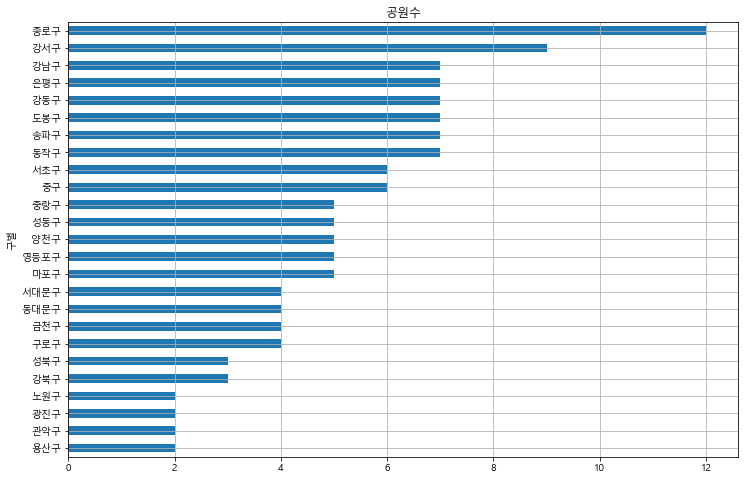

In [58]:
park_g['공원명'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='공원수')
plt.show()

In [66]:
map3 = folium.Map(location=[37.5502, 126.982], zoom_start=13)

map3.choropleth(geo_data = geo_data,
               data = pop1['인구수'],
               columns = [pop1.index, pop1['인구수']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on='feature.id')

for n in park3.index:
    folium.CircleMarker(
        location=[park3.lat[n], park3.lng[n]],
        radius= park3.면적[n] / 100000,
        color='#3186cc',
        fill_color='#3186cc',
    ).add_to(map3)
title_html = '<h3 align="center" style="font-size:20px"><b>공원 면적과 구 인구</b></h3>'
map3.get_root().html.add_child(folium.Element(title_html))
map3

In [87]:
map3 = folium.Map(location=[37.5502, 126.982], zoom_start=13)

for n in sup_pop1.index:
    folium.CircleMarker(
        location=[sup_pop1.lat[n], sup_pop1.lng[n]],
        radius= sup_pop1.구면적[n] /1000000,
        color='green',
        fill_color='green',
    ).add_to(map3)

for n in park3.index:
    folium.CircleMarker(
        location=[park3.lat[n], park3.lng[n]],
        radius= park3.면적[n] / 100000,
        color='#3186cc',
        fill_color='#3186cc',
    ).add_to(map3)

title_html = '<h3 align="center" style="font-size:20px"><b>공원 면적과 구면적</b></h3>'
map3.get_root().html.add_child(folium.Element(title_html))
map3